In [1]:
import numpy as np
import pandas as pd

from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
from matplotlib import dates as md
import seaborn as sns
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ashrae-energy-prediction/sample_submission.csv
/kaggle/input/ashrae-energy-prediction/building_metadata.csv
/kaggle/input/ashrae-energy-prediction/weather_train.csv
/kaggle/input/ashrae-energy-prediction/weather_test.csv
/kaggle/input/ashrae-energy-prediction/train.csv
/kaggle/input/ashrae-energy-prediction/test.csv


building_meta.csv
* site_id - Foreign key for the weather files.
* building_id - Foreign key for training.csv
* primary_use - Indicator of the primary category of activities for the building based on EnergyStar property type definitions
* square_feet - Gross floor area of the building
* year_built - Year building was opened
* floor_count - Number of floors of the building

In [2]:
df_meta = pd.read_csv('/kaggle/input/ashrae-energy-prediction/building_metadata.csv')
df_meta

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [3]:
piv_tab = df_meta.pivot_table(index = 'site_id', columns = 'primary_use', values = 'building_id') # site_id - Foreign key for the weather files
piv_tab

primary_use,Education,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,Other,Parking,Public services,Religious worship,Retail,Services,Technology/science,Utility,Warehouse/storage
site_id,,,,,,,,,,,,,,,,
0,35.000000,56.800000,NaN,NaN,60.222222,NaN,55.583333,60.800000,68.500000,NaN,NaN,52.333333,NaN,NaN,NaN,NaN
1,115.500000,137.000000,NaN,NaN,131.500000,NaN,147.500000,NaN,NaN,138.500000,NaN,NaN,NaN,NaN,NaN,NaN
2,219.147541,241.238095,230.0,208.0,215.000000,NaN,231.166667,NaN,228.000000,203.500000,186.0,170.000000,NaN,NaN,285.0,164.50
3,410.663043,405.136364,NaN,501.0,444.000000,NaN,440.782609,506.500000,431.000000,440.779070,538.0,368.000000,NaN,NaN,NaN,446.00
4,611.303030,608.444444,NaN,NaN,605.000000,NaN,NaN,NaN,635.000000,599.166667,NaN,NaN,NaN,581.0,606.0,NaN
5,716.265306,678.888889,NaN,670.0,671.000000,674.333333,688.000000,656.000000,NaN,679.000000,NaN,NaN,NaN,NaN,NaN,NaN
6,766.800000,771.750000,NaN,NaN,769.666667,NaN,760.090909,NaN,NaN,770.000000,NaN,NaN,NaN,NaN,NaN,NaN
7,796.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,835.583333,NaN,NaN,NaN,NaN,841.000000,838.222222,NaN,841.107143,NaN,NaN,NaN,NaN,NaN,829.50


<AxesSubplot:xlabel='site_id'>

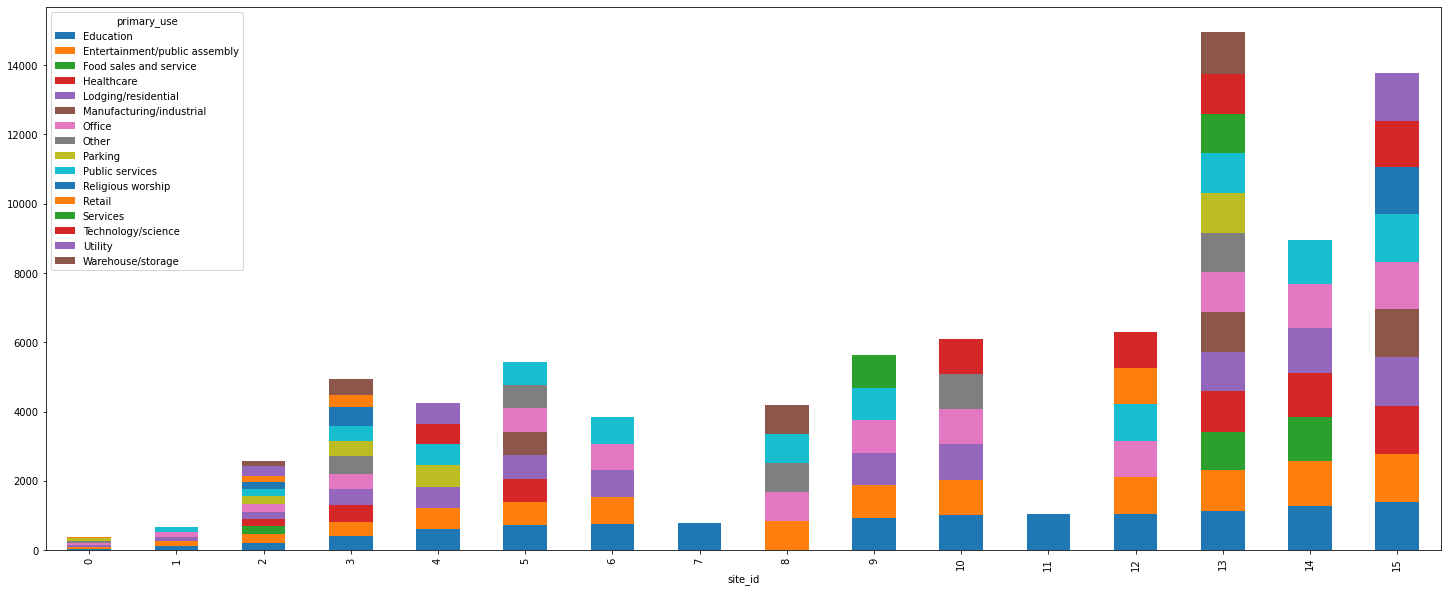

In [4]:
# Pivot table visualisation 
piv_tab.plot.bar(stacked = True, figsize = (25,10))

In [5]:
# Sort by site_id 2 ('Weather data from a meteorological station as close as possible to the site')
df_meta = df_meta[df_meta['site_id']== 2]
df_meta

,site_id,building_id,primary_use,square_feet,year_built,floor_count
156,2,156,Public services,43681,2007.0,NaN
157,2,157,Office,5258,NaN,NaN
158,2,158,Office,10135,NaN,NaN
159,2,159,Education,9788,NaN,NaN
160,2,160,Entertainment/public assembly,15786,NaN,NaN
...,...,...,...,...,...,...
286,2,286,Lodging/residential,32841,1935.0,NaN
287,2,287,Office,33713,1956.0,NaN
288,2,288,Entertainment/public assembly,10733,2005.0,NaN
289,2,289,Entertainment/public assembly,9666,2005.0,NaN


train.csv
* building_id - Foreign key for the building metadata.
* meter - The meter id code. Read as {0: electricity, 1: chilledwater, 2: steam, 3: hotwater}. Not every building has all meter types.
* timestamp - When the measurement was taken
* meter_reading - The target variable. Energy consumption in kWh (or equivalent). Note that this is real data with measurement error, which we expect will impose a baseline level of modeling error. UPDATE: as discussed here, the site 0 electric meter readings are in kBTU.

In [6]:
df_train = pd.read_csv('/kaggle/input/ashrae-energy-prediction/train.csv', index_col = 'timestamp', parse_dates=True)
df_train_steam = df_train.loc[df_train.meter == 3] # return only for steam (meter nr 3)
df_train_steam

,building_id,meter,meter_reading
timestamp,,,
2016-01-01 00:00:00,106,3,0.000
2016-01-01 00:00:00,109,3,0.000
2016-01-01 00:00:00,112,3,96.978
2016-01-01 00:00:00,113,3,19.597
2016-01-01 00:00:00,114,3,100.000
...,...,...,...
2016-12-31 23:00:00,1322,3,2476.610
2016-12-31 23:00:00,1323,3,1909.330
2016-12-31 23:00:00,1324,3,364.019


weather_train.csv

Weather data from a meteorological station as close as possible to the site.

* site_id
* air_temperature - Degrees Celsius
* cloud_coverage - Portion of the sky covered in clouds, in oktas
* dew_temperature - Degrees Celsius
* precip_depth_1_hr - Millimeters
* sea_level_pressure - Millibar/hectopascals
* wind_direction - Compass direction (0-360)
* wind_speed - Meters per second

In [7]:
df_weather = pd.read_csv('/kaggle/input/ashrae-energy-prediction/weather_train.csv', index_col = 'timestamp', parse_dates = True)
df_weather

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,
2016-01-01 00:00:00,0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01 01:00:00,0,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2016-01-01 02:00:00,0,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
2016-01-01 03:00:00,0,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
2016-01-01 04:00:00,0,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,15,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
2016-12-31 20:00:00,15,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
2016-12-31 21:00:00,15,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1


In [8]:
for col in df_weather.columns:
    df_weather[col] = df_weather[col].interpolate(limit_direction = 'both') # fill "na" values

df_weather

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,
2016-01-01 00:00:00,0,25.0,6.0,20.0,-1.0,1019.70,0.0,0.0
2016-01-01 01:00:00,0,24.4,4.0,21.1,-1.0,1020.20,70.0,1.5
2016-01-01 02:00:00,0,22.8,2.0,21.1,0.0,1020.20,0.0,0.0
2016-01-01 03:00:00,0,21.1,2.0,20.6,0.0,1020.10,0.0,0.0
2016-01-01 04:00:00,0,20.0,2.0,20.0,-1.0,1020.00,250.0,2.6
...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,15,3.0,1.5,-8.0,-1.0,1007.55,180.0,5.7
2016-12-31 20:00:00,15,2.8,2.0,-8.9,-1.0,1007.40,180.0,7.7
2016-12-31 21:00:00,15,2.8,2.0,-7.2,-1.0,1007.50,180.0,5.1


In [9]:
piv_tab_2 = df_train_steam.pivot_table(index = 'timestamp', columns = 'building_id', values = 'meter_reading') # site_id - Foreign key for the weather files
piv_tab_2.reset_index()
piv_tab_2

building_id,106,109,112,113,114,117,119,121,138,139,...,1312,1317,1318,1319,1321,1322,1323,1324,1325,1331
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0,0.0,96.9780,19.597,100.000,19.6809,200.000,299.729,0.2421,0.0,...,246.652,1975.310,169.291,219.996,591.428,1380.94,1407.92,0.0000,320.205,7074.41
2016-01-01 01:00:00,10.0,0.0,93.6492,30.000,300.000,30.0000,300.000,593.002,9.7579,200.0,...,355.885,2388.650,303.882,394.899,496.996,1495.68,1330.88,0.0000,328.548,7102.45
2016-01-01 02:00:00,10.0,100.0,186.3510,30.000,300.000,30.2273,300.000,600.000,0.0000,100.0,...,127.009,1743.760,298.701,388.168,0.000,1462.17,1503.05,0.0000,279.363,8953.79
2016-01-01 03:00:00,10.0,0.0,190.0000,30.000,300.000,29.9995,300.000,600.000,0.0000,200.0,...,191.372,1287.230,308.022,400.280,0.000,1393.04,1451.96,0.0000,325.803,6595.54
2016-01-01 04:00:00,0.0,0.0,100.0000,30.000,300.000,39.7732,304.067,600.000,10.0000,100.0,...,181.084,1560.430,295.656,384.210,0.000,1496.67,1046.95,0.0000,332.713,6450.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,10.0,0.0,90.0000,30.000,299.863,64.9956,200.000,600.551,65.1067,100.0,...,385.244,1097.540,722.163,938.462,1018.250,2378.91,1492.08,30.1301,157.906,10658.50
2016-12-31 20:00:00,0.0,0.0,0.0000,30.000,300.058,70.0000,300.000,650.942,79.9205,0.0,...,333.829,754.484,716.072,930.548,917.235,2590.96,1771.05,142.7020,192.229,9083.54
2016-12-31 21:00:00,0.0,0.0,0.0000,30.000,253.326,64.9272,200.000,600.000,89.9422,100.0,...,370.758,1415.540,708.321,920.475,1335.050,2702.25,1856.02,129.6750,187.683,9028.32


In [10]:
df_site_merged = piv_tab_2.merge(df_weather, left_index=True, right_index=True) # Merge 'df_train_steam' and 'df_weather'
df_site_merged = pd.DataFrame(df_site_merged.to_records())
df_site_merged = df_site_merged.set_index('timestamp')
df_site_merged

,106,109,112,113,114,117,119,121,138,139,...,1325,1331,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0,0.0,96.978,19.597,100.000,19.6809,200.000,299.729,0.2421,0.0,...,320.205,7074.41,0,25.0,6.000000,20.0,-1.000000,1019.7,0.0,0.0
2016-01-01 00:00:00,0.0,0.0,96.978,19.597,100.000,19.6809,200.000,299.729,0.2421,0.0,...,320.205,7074.41,1,3.8,0.571429,2.4,0.000000,1020.9,240.0,3.1
2016-01-01 00:00:00,0.0,0.0,96.978,19.597,100.000,19.6809,200.000,299.729,0.2421,0.0,...,320.205,7074.41,2,15.6,6.000000,-5.6,0.000000,1015.3,270.0,3.6
2016-01-01 00:00:00,0.0,0.0,96.978,19.597,100.000,19.6809,200.000,299.729,0.2421,0.0,...,320.205,7074.41,3,10.0,8.000000,2.2,0.000000,1021.1,350.0,4.1
2016-01-01 00:00:00,0.0,0.0,96.978,19.597,100.000,19.6809,200.000,299.729,0.2421,0.0,...,320.205,7074.41,7,-1.8,0.002785,-3.2,0.555556,1016.0,280.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:00:00,0.0,0.0,0.000,30.000,246.577,69.9805,251.407,651.621,94.9620,0.0,...,156.050,8501.02,11,-9.6,4.000580,-10.8,5.000000,1004.7,70.0,4.1
2016-12-31 23:00:00,0.0,0.0,0.000,30.000,246.577,69.9805,251.407,651.621,94.9620,0.0,...,156.050,8501.02,12,6.5,8.000000,5.3,-0.998630,1019.5,340.0,6.0
2016-12-31 23:00:00,0.0,0.0,0.000,30.000,246.577,69.9805,251.407,651.621,94.9620,0.0,...,156.050,8501.02,13,-5.6,4.000000,-11.1,0.000000,1009.8,240.0,3.6


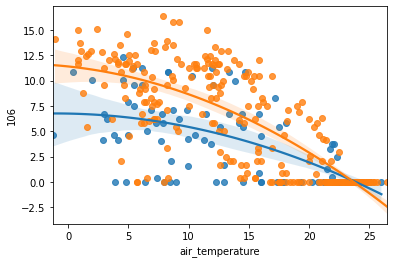

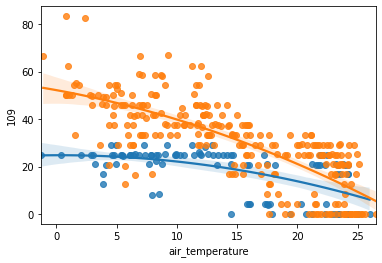

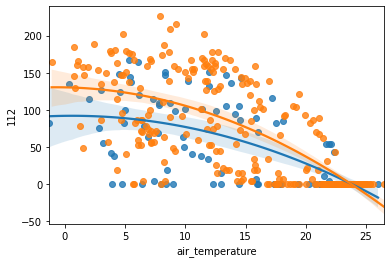

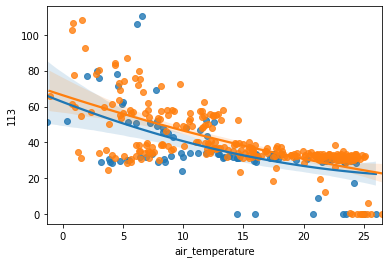

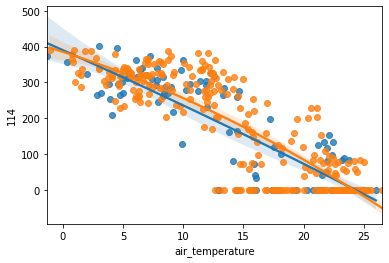

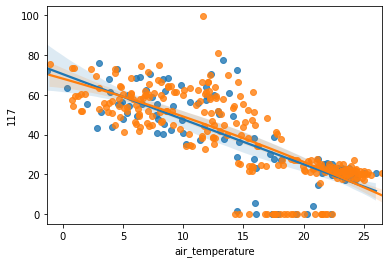

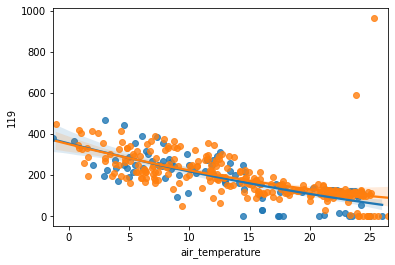

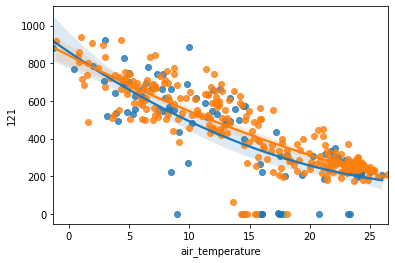

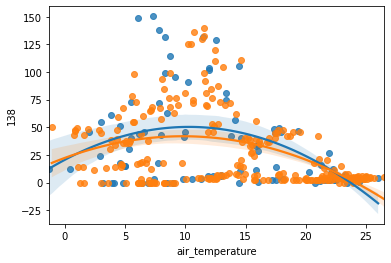

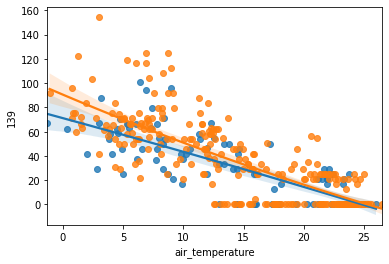

In [11]:
for col in df_site_merged.columns[:10]: # lets check first 10 buildings
    df_temp = df_site_merged.resample('D').mean() # keep only day
    df_temp['weekday'] = df_temp.index.weekday # create a column 'weekday' with number of weekday
    sns.regplot(x = 'air_temperature', y = col, data = df_temp[df_temp['weekday'] > 4], order = 2)
    sns.regplot(x = 'air_temperature', y = col, data = df_temp[df_temp['weekday'] <= 4], order = 2)
    plt.show()

In [12]:
df_site_merged['hour'] = df_site_merged.index.hour # add column 'hour' in 'df_site_merged'
df_site_merged['weekday'] = df_site_merged.index.weekday # add column 'weekday' in 'df_site_merged'
df_site_merged['timeofweek'] = df_site_merged.index.weekday*24 + df_site_merged.index.hour # add column 'timeofweek' in 'df_site_merged'
# timeofweek shows how many hours have passed since the beginning of the week
df_site_merged

,106,109,112,113,114,117,119,121,138,139,...,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,weekday,timeofweek
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0,0.0,96.978,19.597,100.000,19.6809,200.000,299.729,0.2421,0.0,...,25.0,6.000000,20.0,-1.000000,1019.7,0.0,0.0,0,4,96
2016-01-01 00:00:00,0.0,0.0,96.978,19.597,100.000,19.6809,200.000,299.729,0.2421,0.0,...,3.8,0.571429,2.4,0.000000,1020.9,240.0,3.1,0,4,96
2016-01-01 00:00:00,0.0,0.0,96.978,19.597,100.000,19.6809,200.000,299.729,0.2421,0.0,...,15.6,6.000000,-5.6,0.000000,1015.3,270.0,3.6,0,4,96
2016-01-01 00:00:00,0.0,0.0,96.978,19.597,100.000,19.6809,200.000,299.729,0.2421,0.0,...,10.0,8.000000,2.2,0.000000,1021.1,350.0,4.1,0,4,96
2016-01-01 00:00:00,0.0,0.0,96.978,19.597,100.000,19.6809,200.000,299.729,0.2421,0.0,...,-1.8,0.002785,-3.2,0.555556,1016.0,280.0,1.5,0,4,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:00:00,0.0,0.0,0.000,30.000,246.577,69.9805,251.407,651.621,94.9620,0.0,...,-9.6,4.000580,-10.8,5.000000,1004.7,70.0,4.1,23,5,143
2016-12-31 23:00:00,0.0,0.0,0.000,30.000,246.577,69.9805,251.407,651.621,94.9620,0.0,...,6.5,8.000000,5.3,-0.998630,1019.5,340.0,6.0,23,5,143
2016-12-31 23:00:00,0.0,0.0,0.000,30.000,246.577,69.9805,251.407,651.621,94.9620,0.0,...,-5.6,4.000000,-11.1,0.000000,1009.8,240.0,3.6,23,5,143


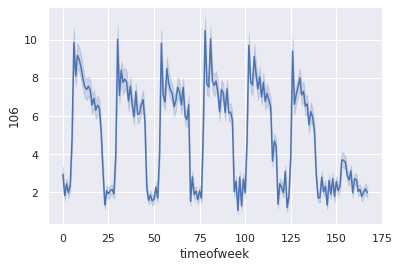

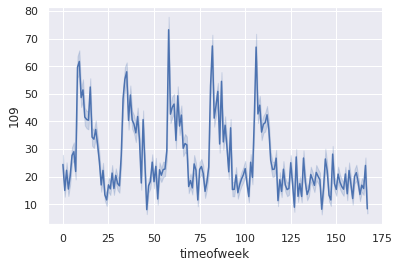

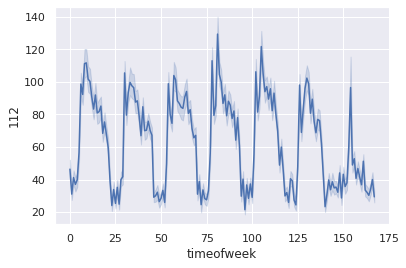

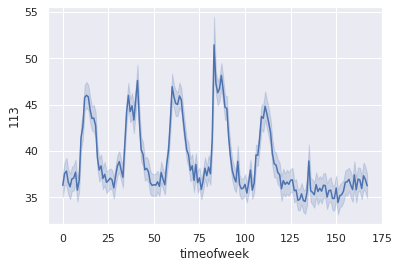

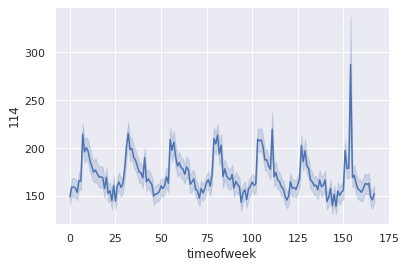

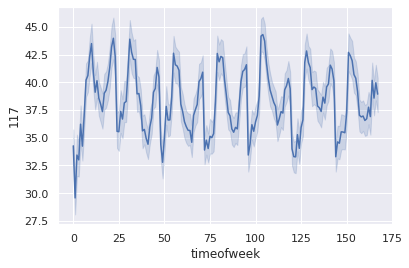

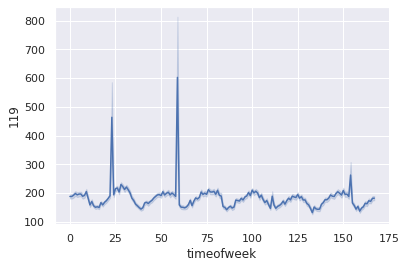

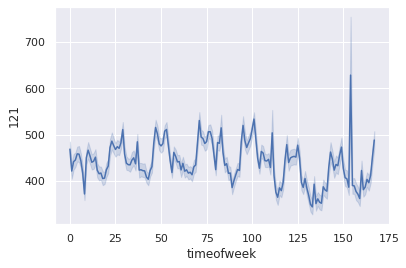

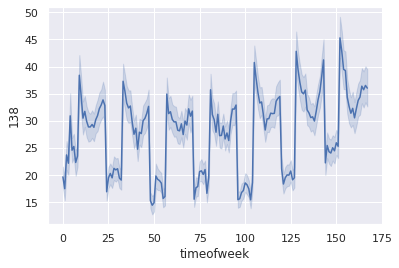

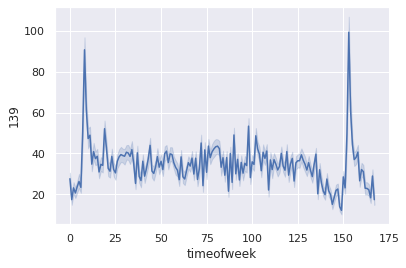

In [13]:
sns.set_theme(style="darkgrid")
for col in df_site_merged.columns[:10]:
    sns.lineplot(data=df_site_merged, x="timeofweek", y=col)
    plt.show()

In [14]:
df_meta['primary_use'].iplot(kind = 'histogram')